In [2]:
!pip install roboflow

In [3]:
!git clone https://github.com/ultralytics/yolov5.git /content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5

fatal: destination path '/content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5' already exists and is not an empty directory.


In [4]:
%cd /content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5

/content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5


In [5]:
!pip install -qr requirements.txt

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="rBs1SmRJzWM3nD3RgqRE")
project = rf.workspace("project-p5nyc").project("lorry-kqgqf")
version = project.version(2)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


In [7]:
!python train.py --img 640 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
       2/49      4.55G    0.06488    0.02818    0.04648         48        640:  58% 29/50 [00:07<00:04,  4.21it/s]/content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       2/49      4.55G    0.06488    0.02799    0.04646         45        640:  60% 30/50 [00:07<00:04,  4.34it/s]/content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
       2/49      4.55G    0.06487    0.02813    0.04646         62        640:  62% 31/50 [00:08<00:04,  4.08it/s]/content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is

In [8]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 640 --conf 0.25 --source {dataset.location}/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5/Lorry-2/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/49 /content/drive/MyDrive/CODE_OBJECT_DETECTION/yolov5/Lorry-2/test/images/Puspakom_lorry-104-_jpg.rf.571bf052184828893022b574611169a1.jpg: 640x640 1 Rearlamp -L- - good, 1 Rearlamp -R- - good, 11.5ms
image 2/49 /content/drive/MyDrive/CODE_OBJECT_DETECT

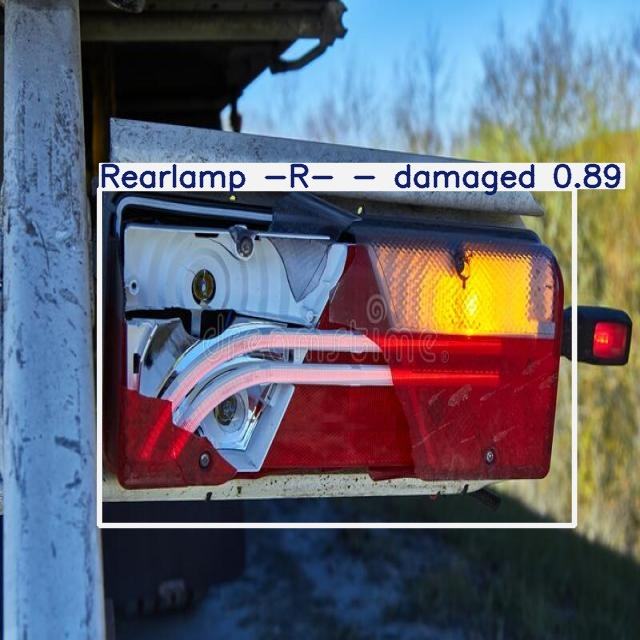

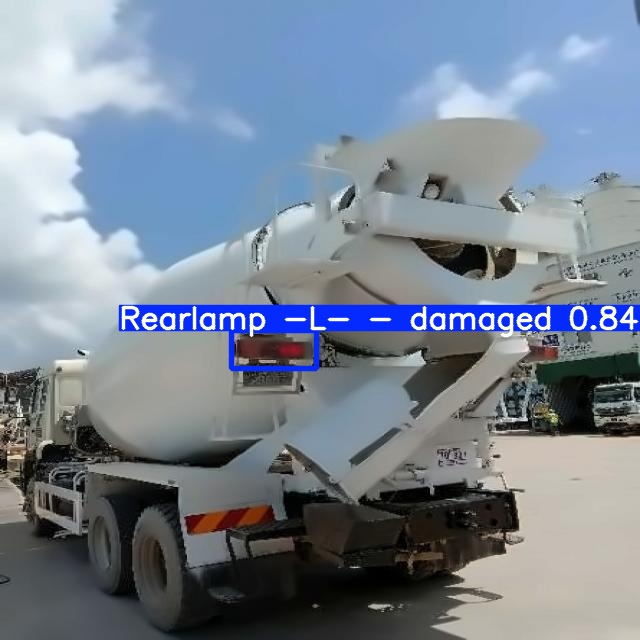

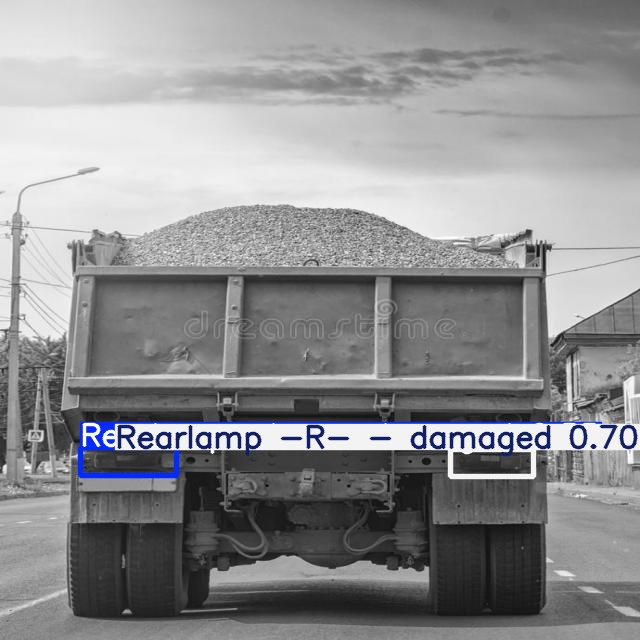

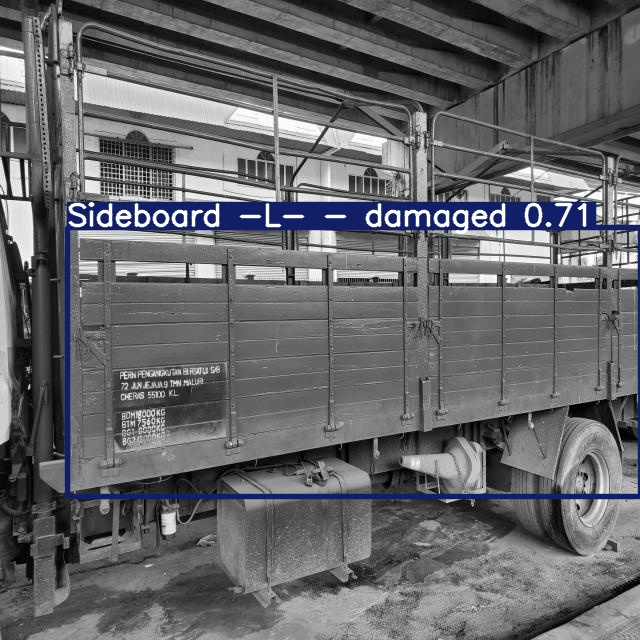

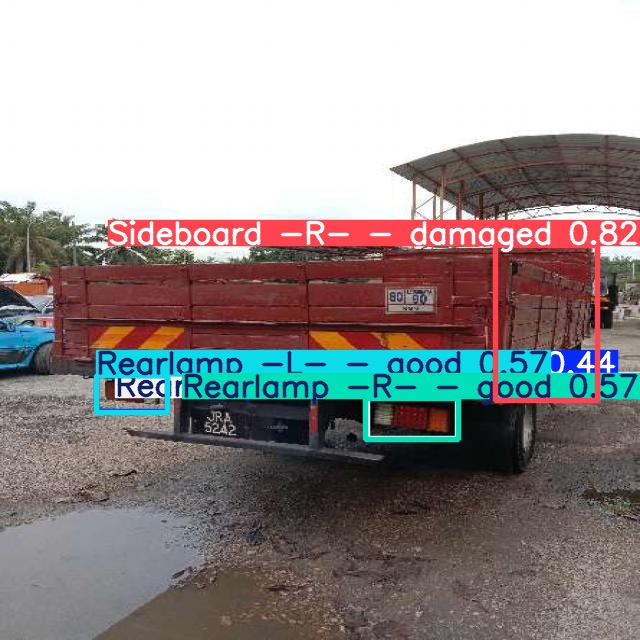

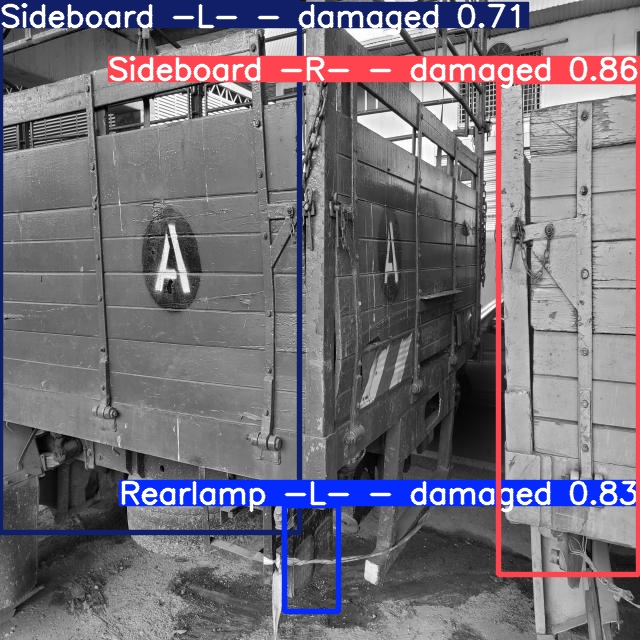

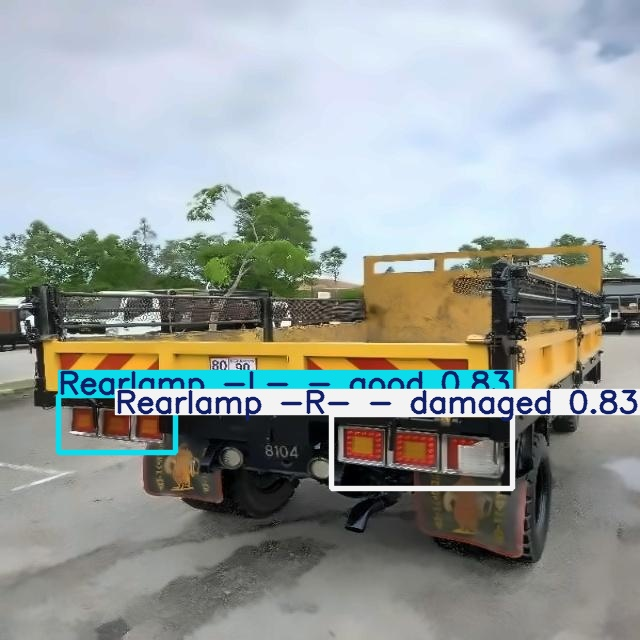

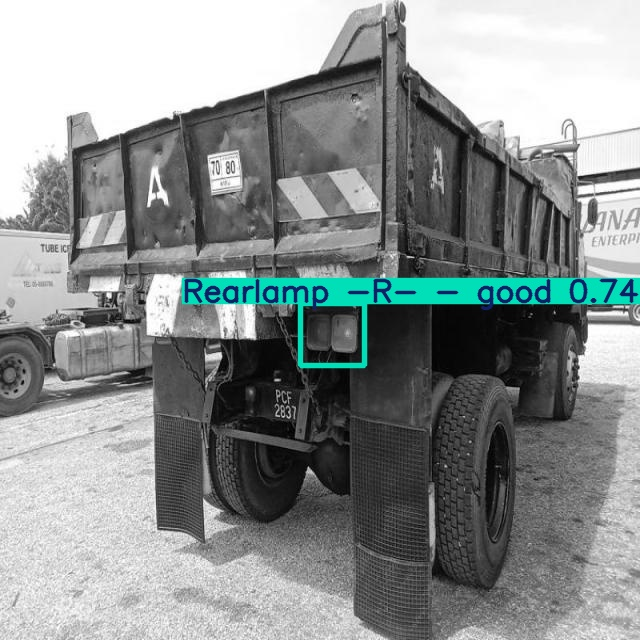

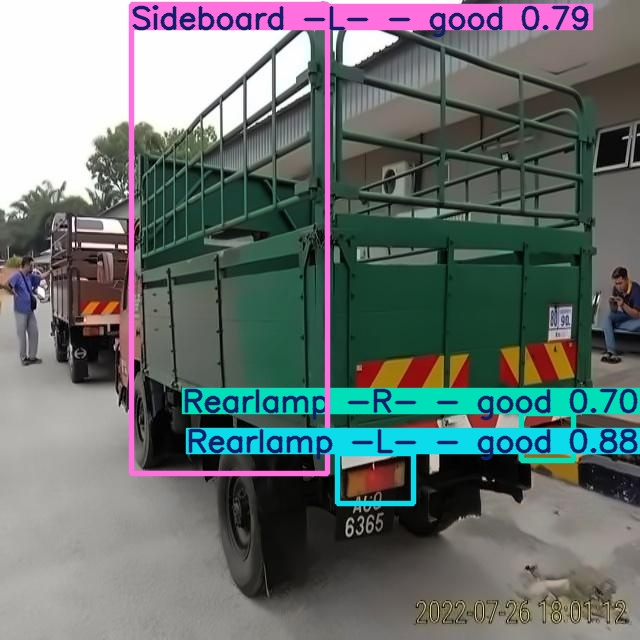

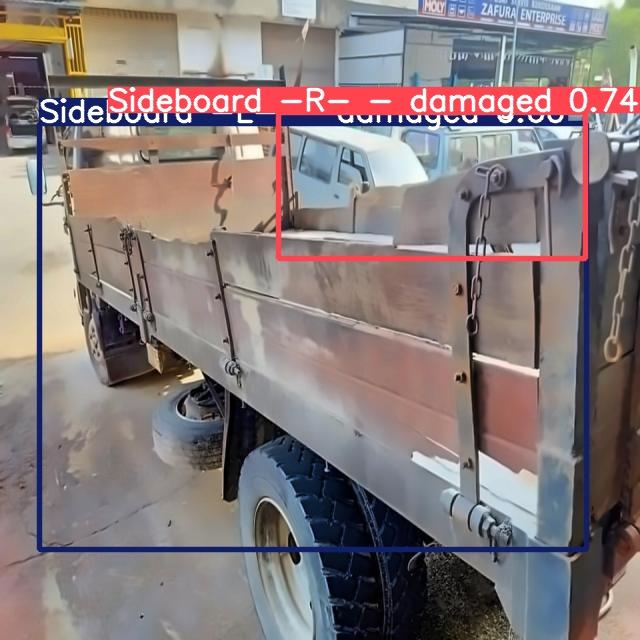

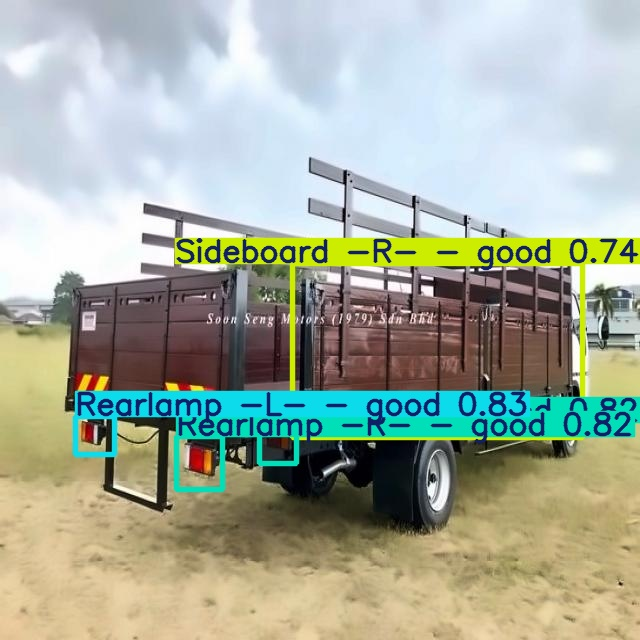

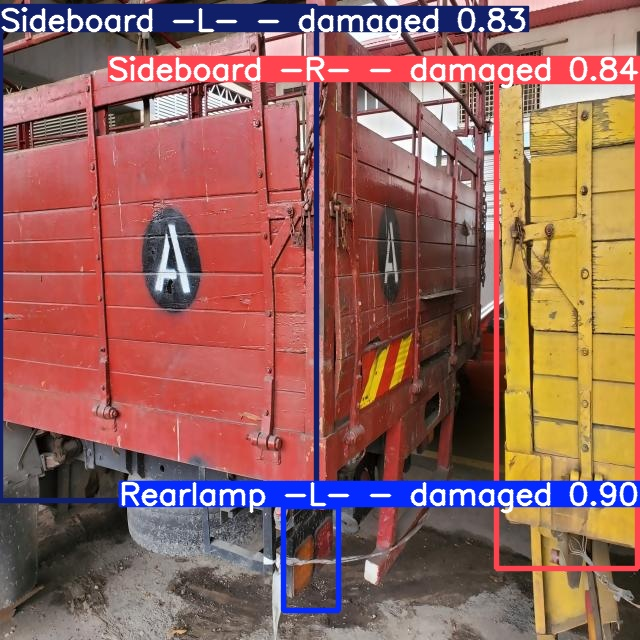

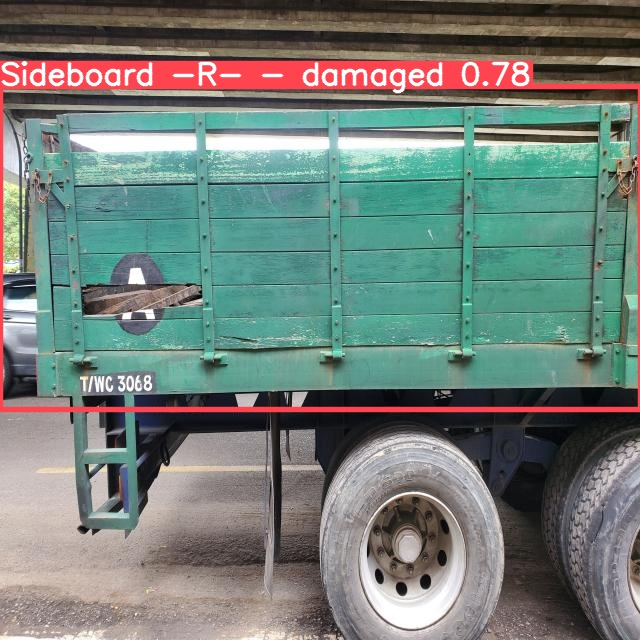

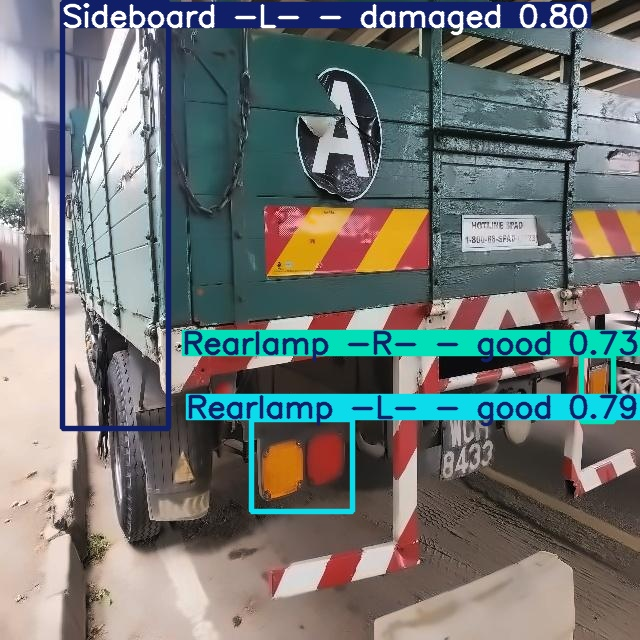

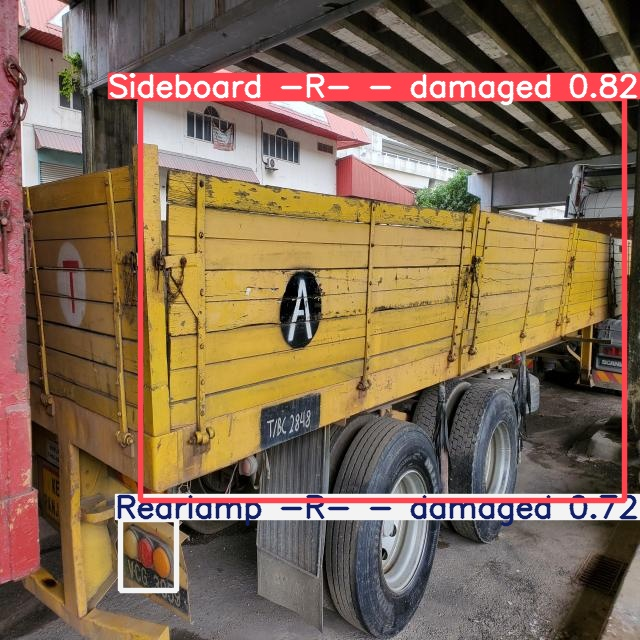

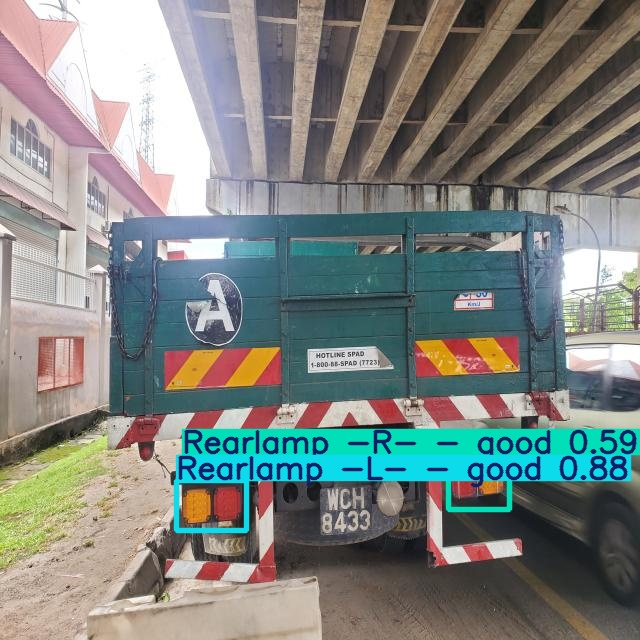

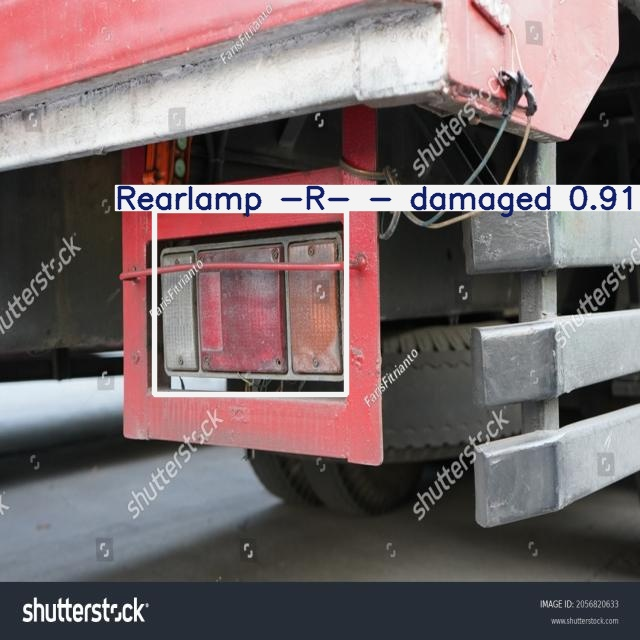

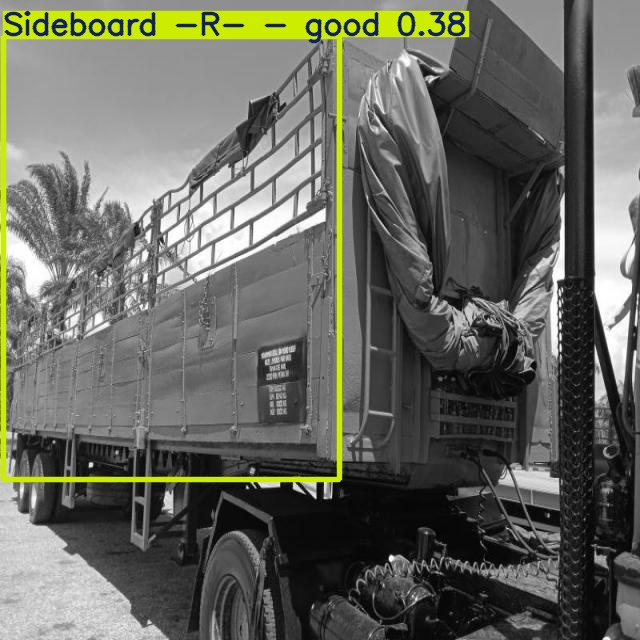

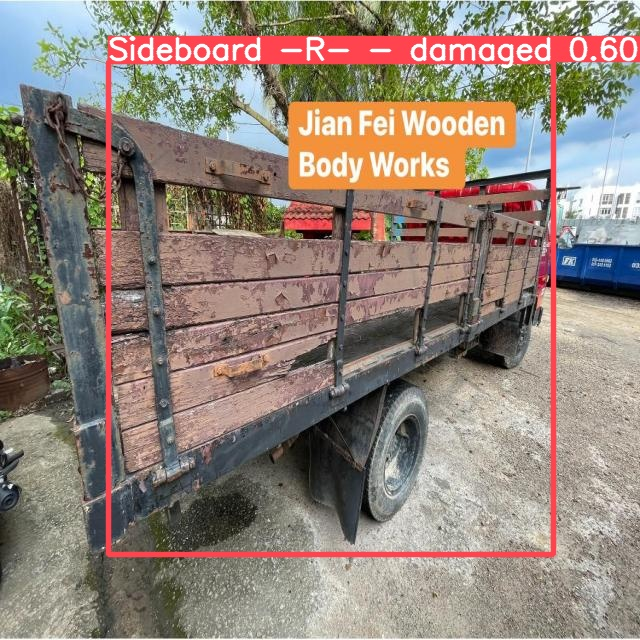

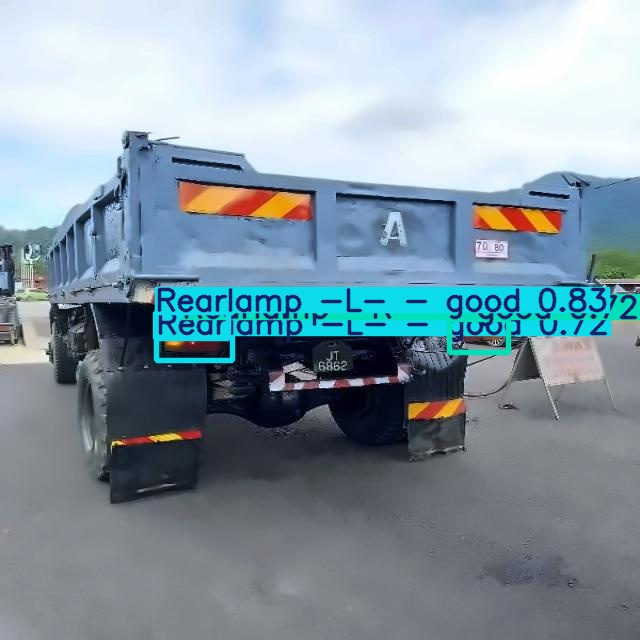

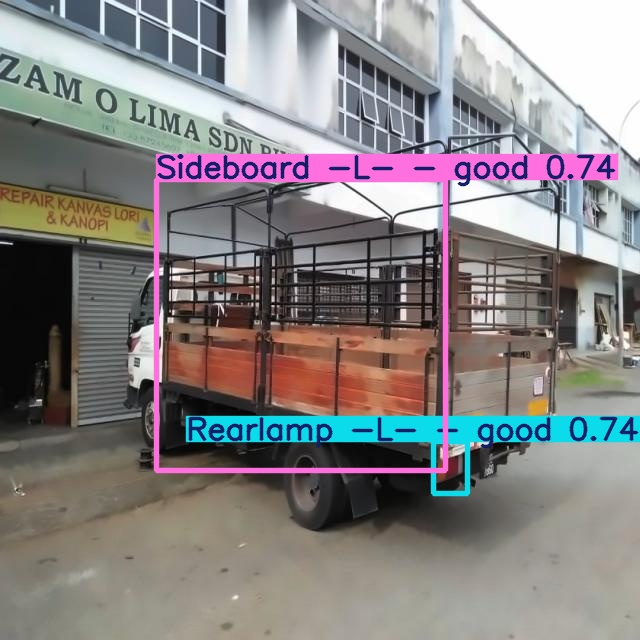

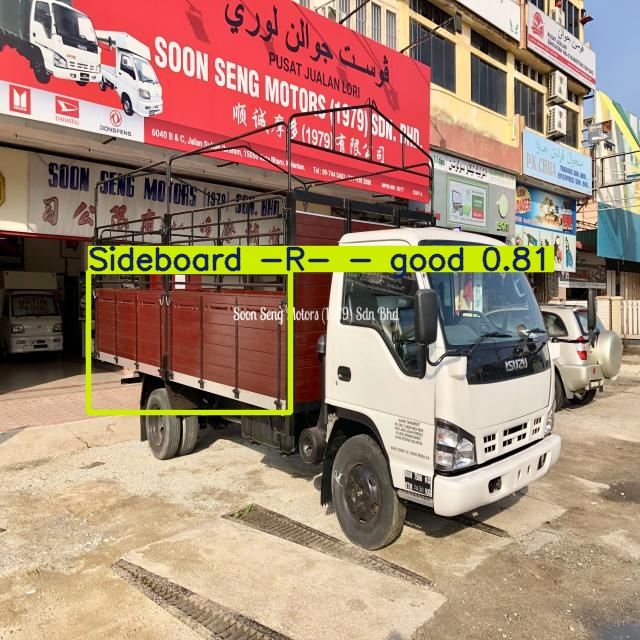

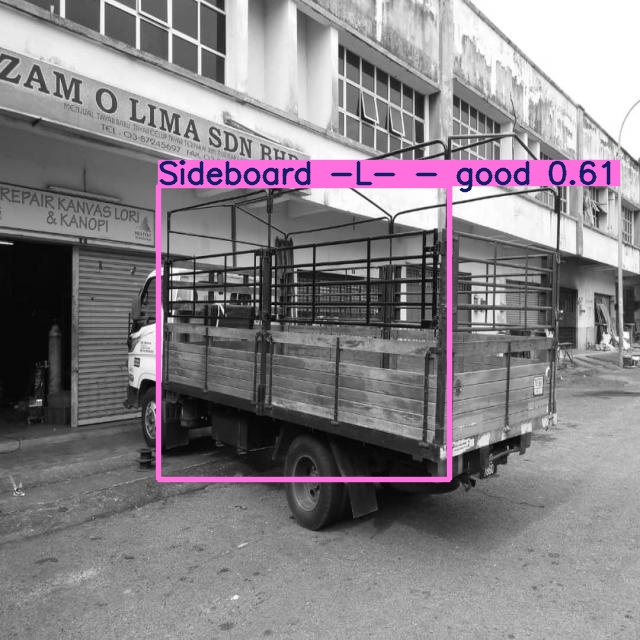

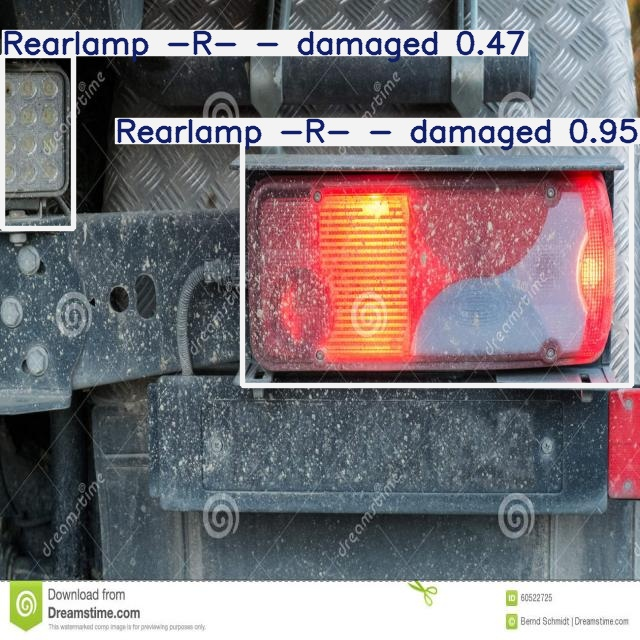

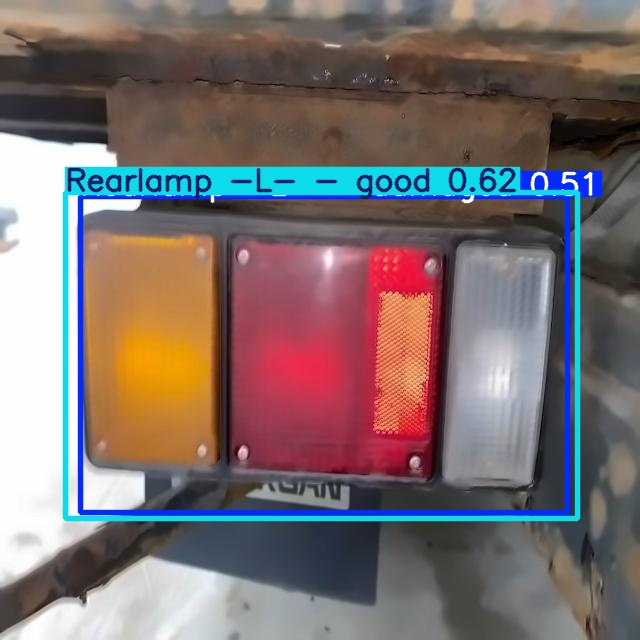

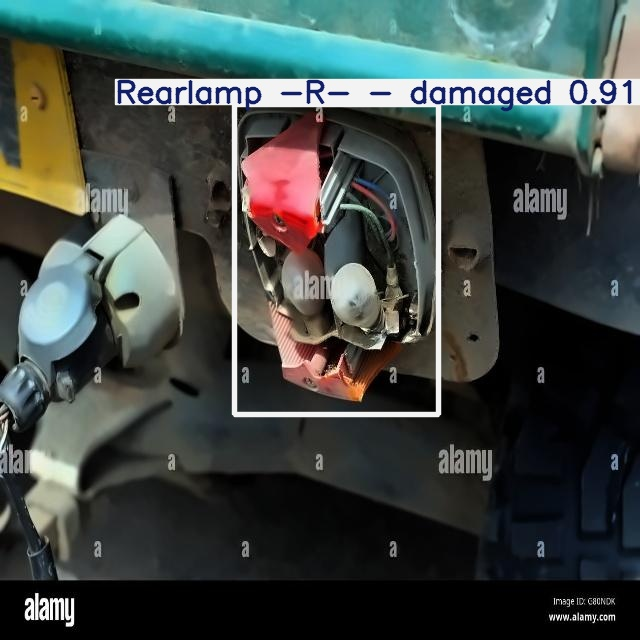

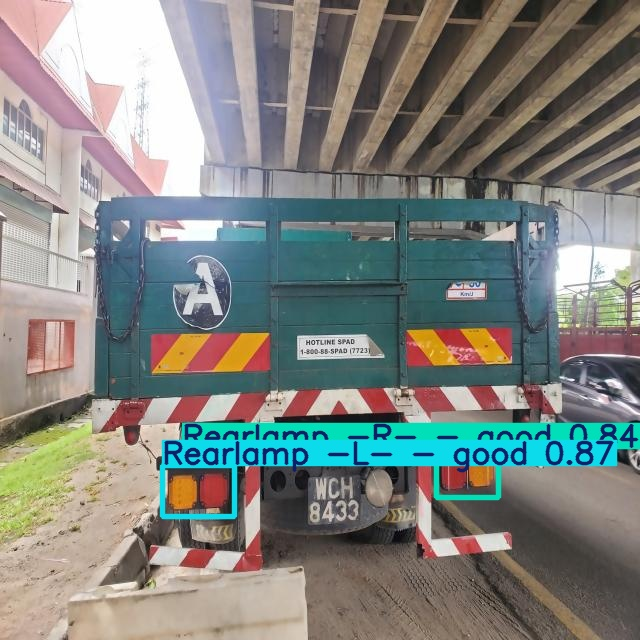

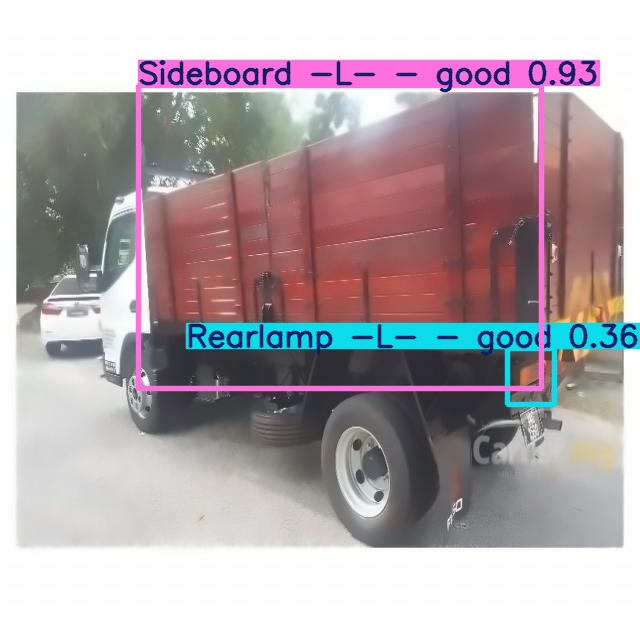

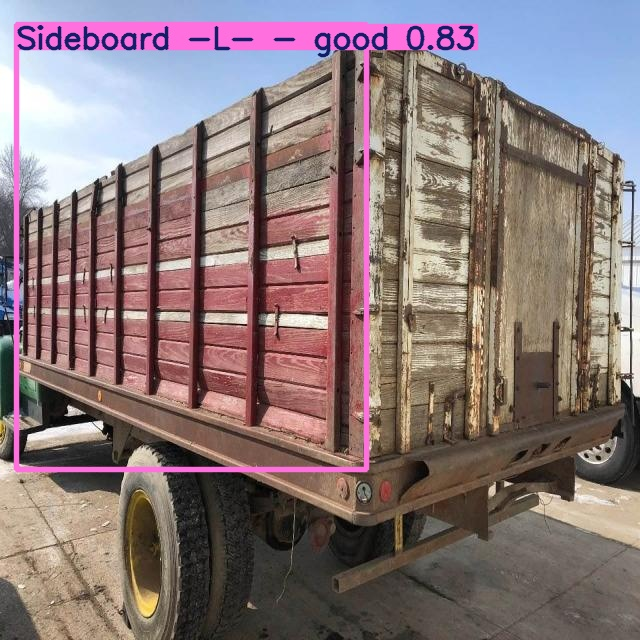

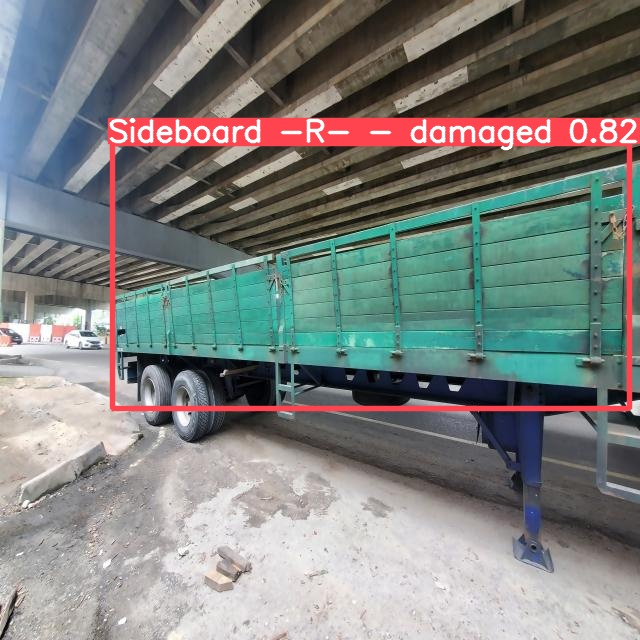

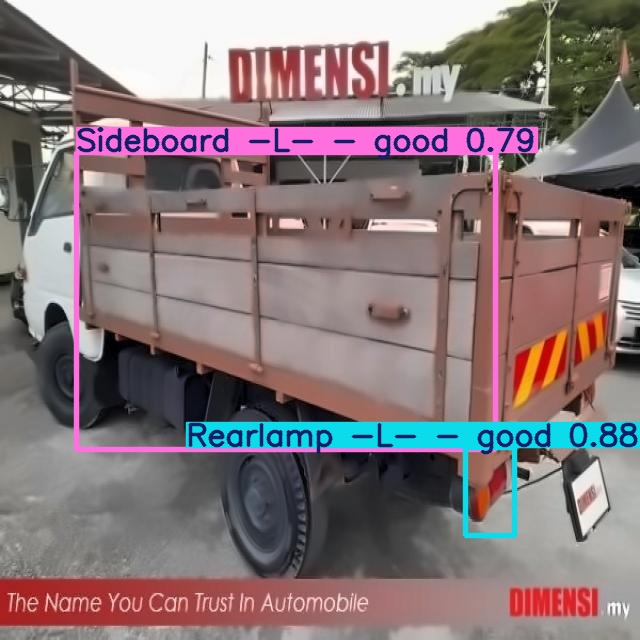

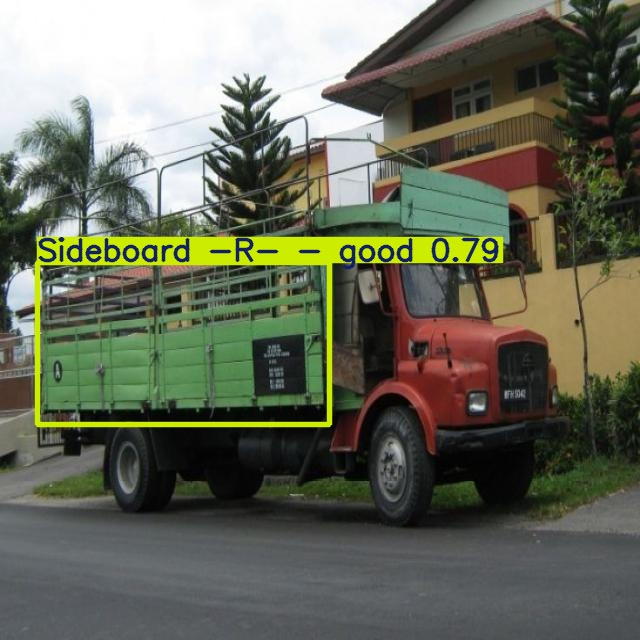

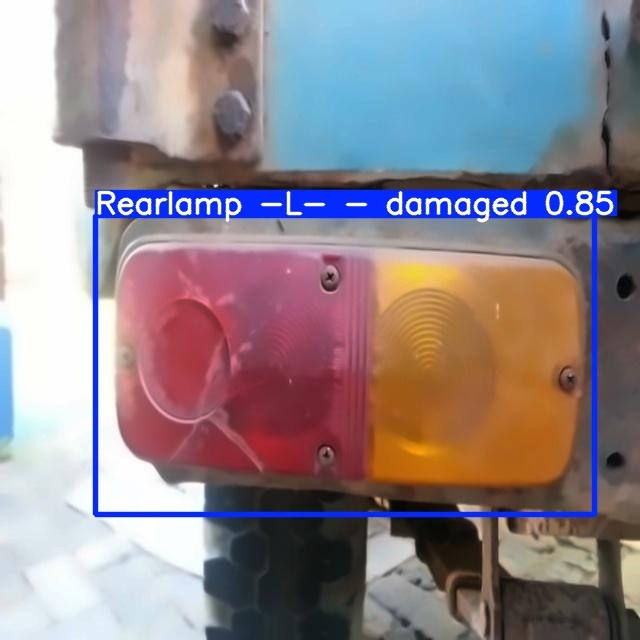

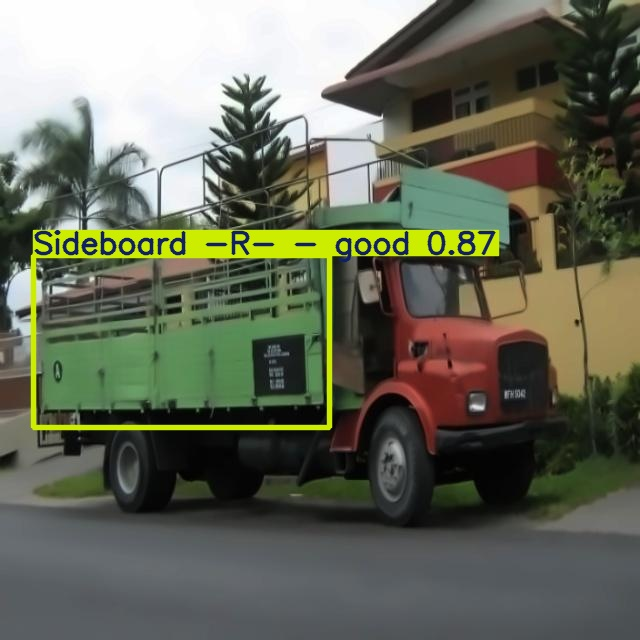

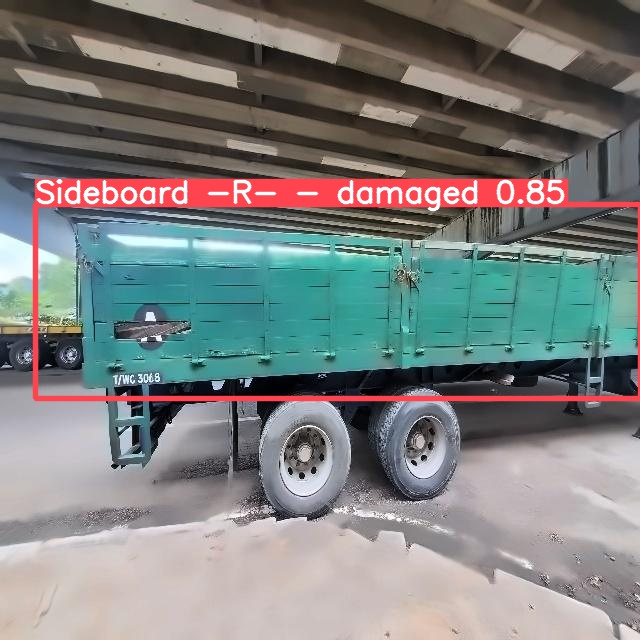

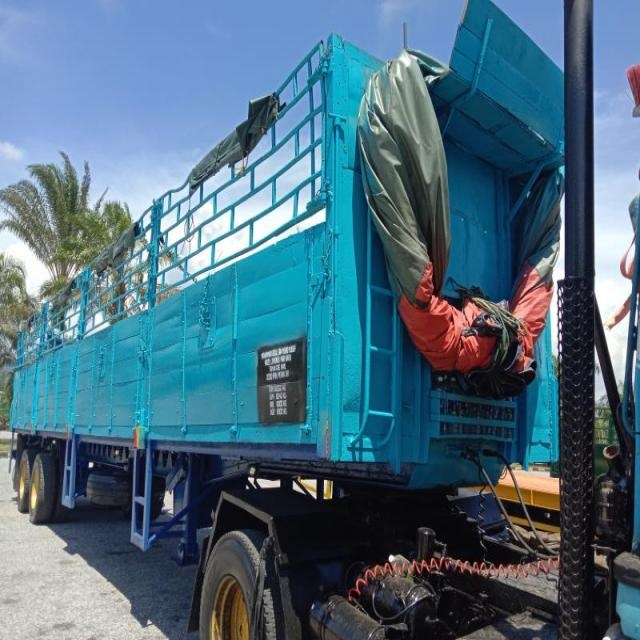

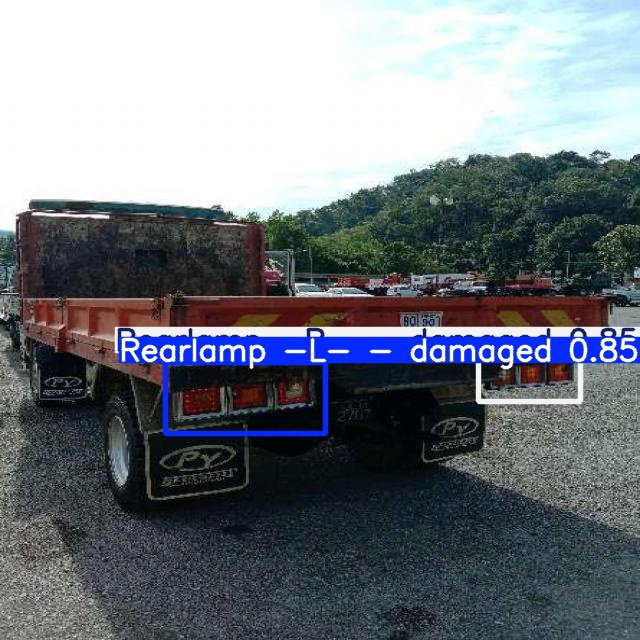

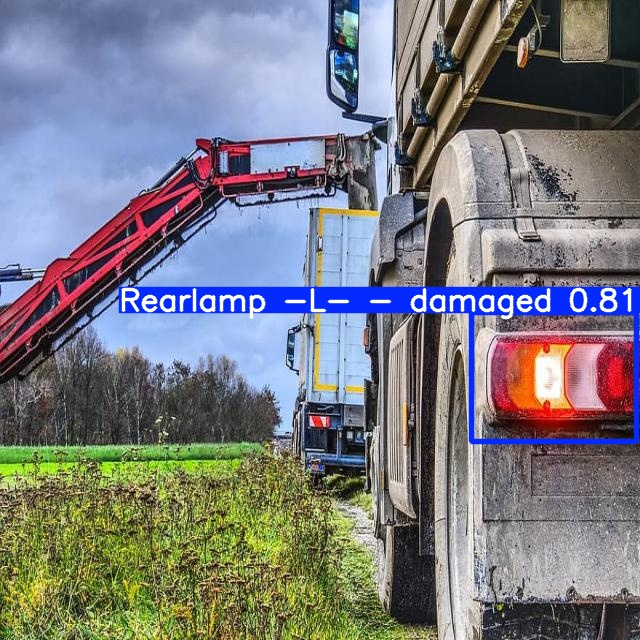

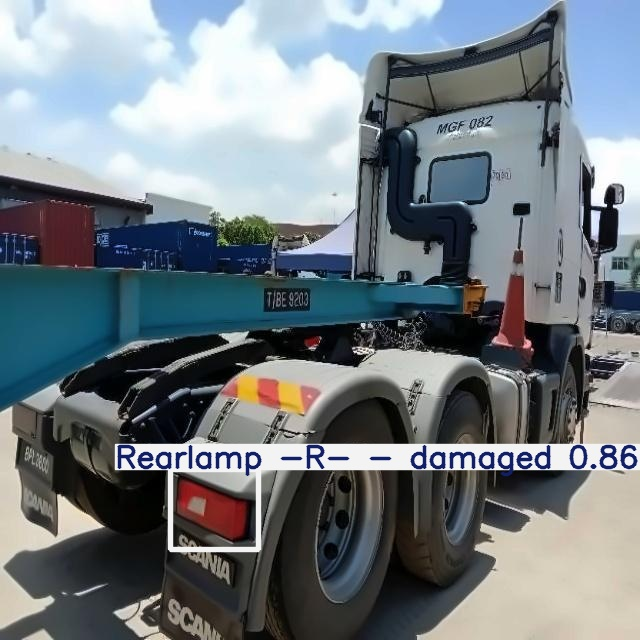

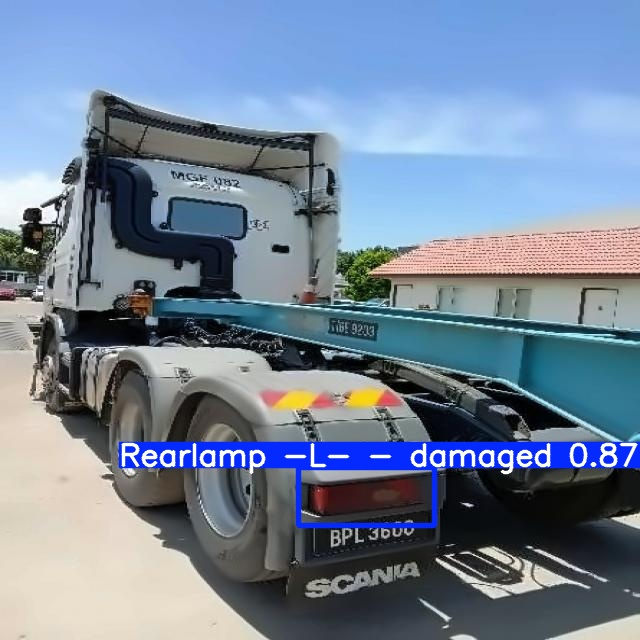

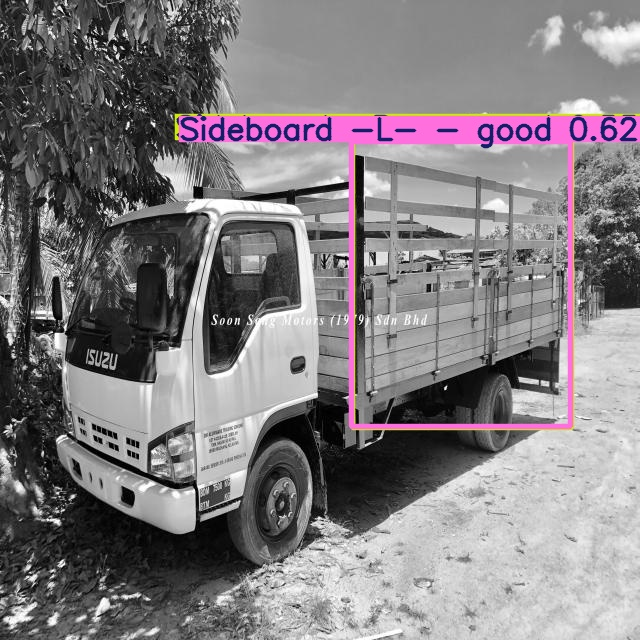

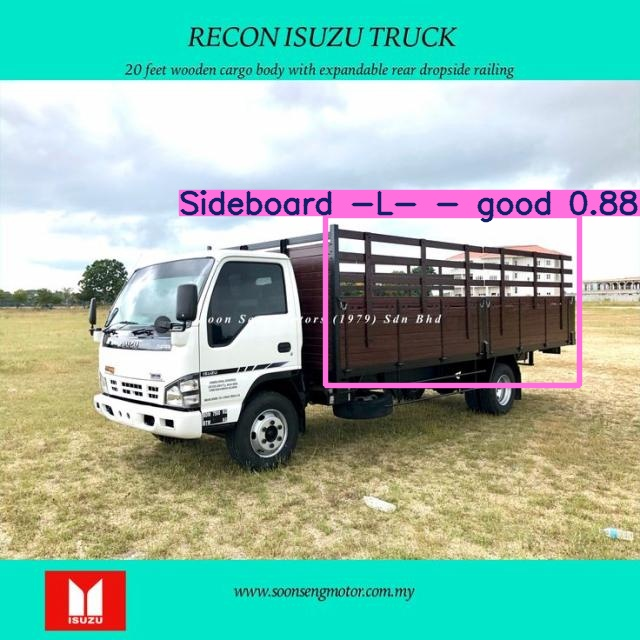

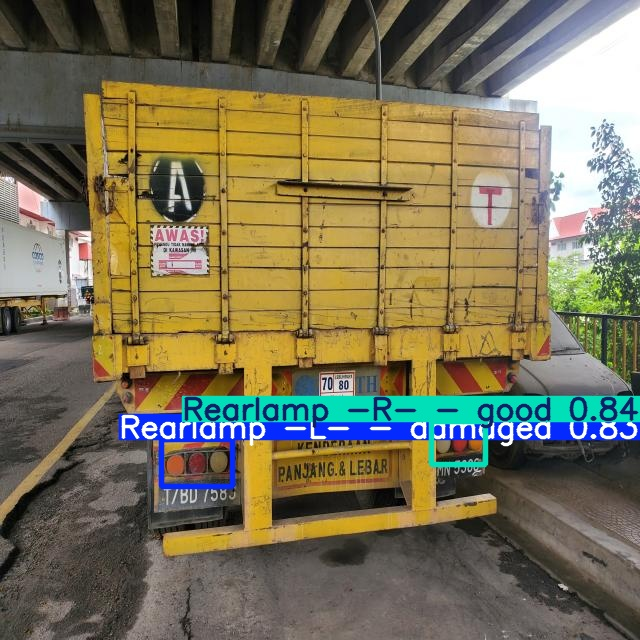

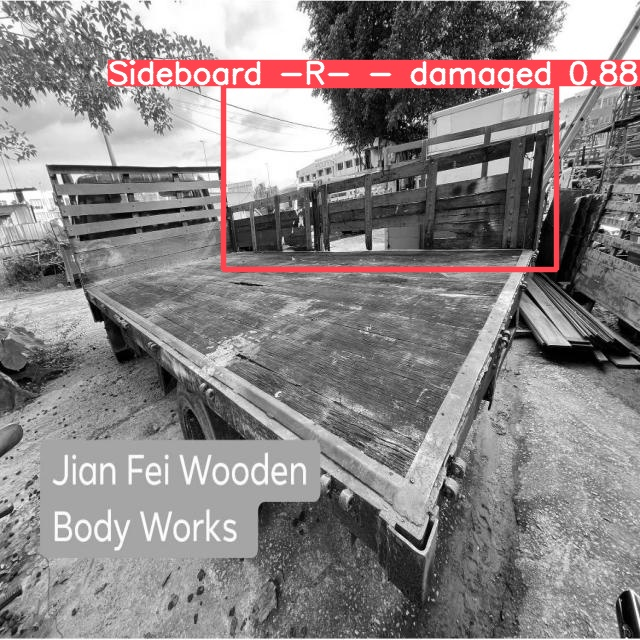

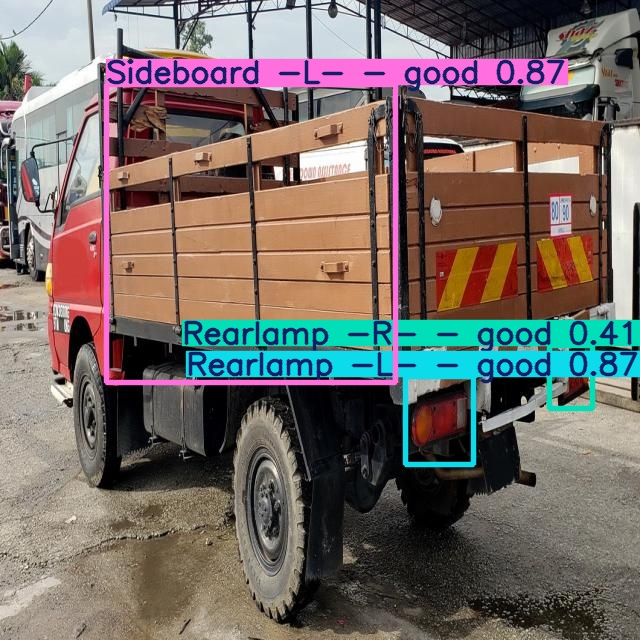

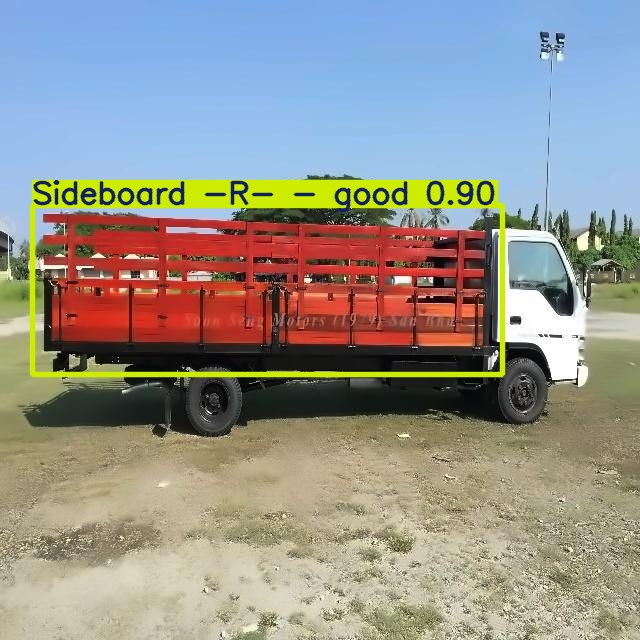

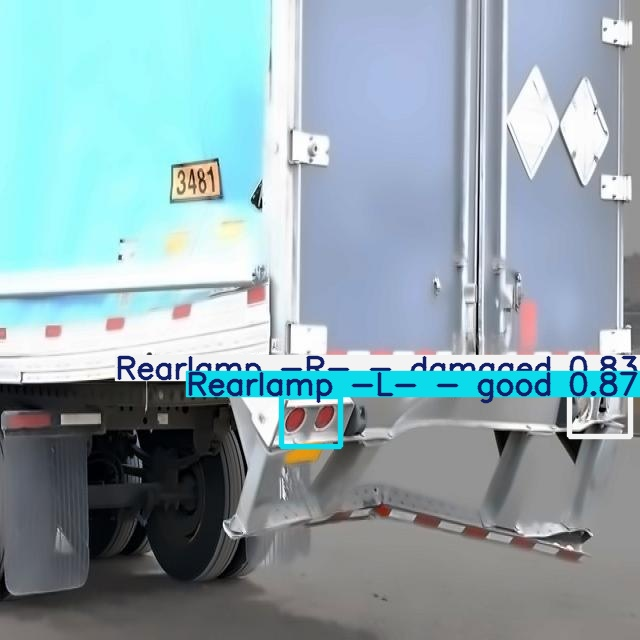

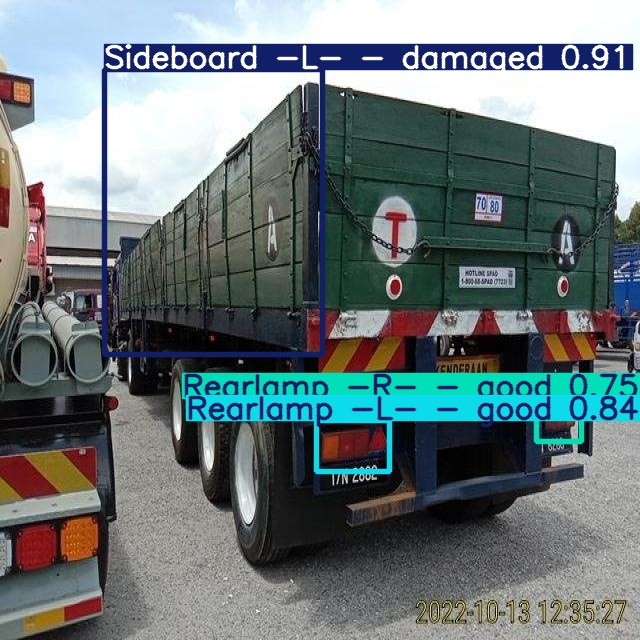

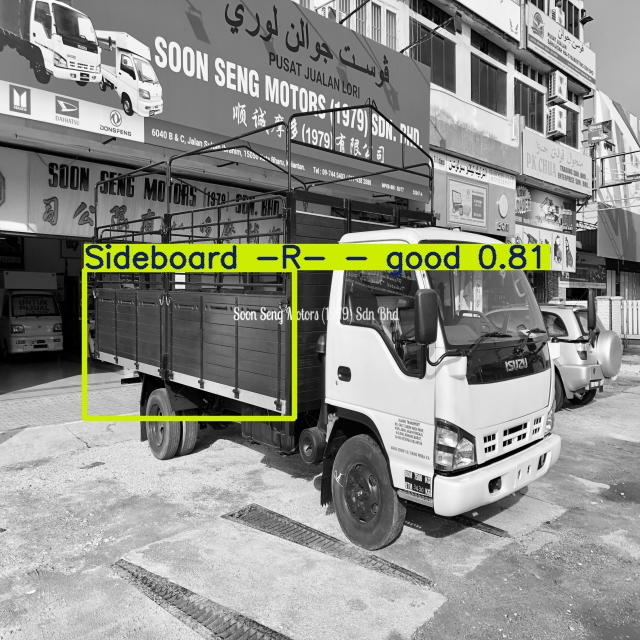

In [9]:
import glob
from IPython.display import Image, display

result_images = glob.glob('runs/detect/exp/*.jpg')

for image in result_images:
    display(Image(filename=image))